In [8]:
import pandas as pd
df = pd.read_csv("C:/Users/Hp/Desktop/Python/uber.csv")
df.head()

,Unnamed: 0,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,24238194,2015-05-07 19:52:06.0000003,7.5,2015-05-07 19:52:06 UTC,-73.999817,40.738354,-73.999512,40.723217,1
1,27835199,2009-07-17 20:04:56.0000002,7.7,2009-07-17 20:04:56 UTC,-73.994355,40.728225,-73.994710,40.750325,1
2,44984355,2009-08-24 21:45:00.00000061,12.9,2009-08-24 21:45:00 UTC,-74.005043,40.740770,-73.962565,40.772647,1
3,25894730,2009-06-26 08:22:21.0000001,5.3,2009-06-26 08:22:21 UTC,-73.976124,40.790844,-73.965316,40.803349,3
4,17610152,2014-08-28 17:47:00.000000188,16.0,2014-08-28 17:47:00 UTC,-73.925023,40.744085,-73.973082,40.761247,5


In [9]:
# Structure and dimensions
print("Shape:", df.shape)
print("\nData Types:\n", df.dtypes)
print("\nMissing Values:\n", df.isnull().sum())
print("\nSummary Stats:\n", df.describe(include='all'))

Shape: (200000, 9)

Data Types:
 Unnamed: 0             int64
key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

Missing Values:
 Unnamed: 0           0
key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    1
dropoff_latitude     1
passenger_count      0
dtype: int64

Summary Stats:
           Unnamed: 0                          key    fare_amount  \
count   2.000000e+05                       200000  200000.000000   
unique           NaN                       200000            NaN   
top              NaN  2009-08-29 02:36:56.0000003            NaN   
freq             NaN                            1            NaN   
mean    2.771250e+07                          NaN      11.359955   
std     1.601382e+07         

In [17]:
# Handle missing values and clean the data for analysis
df_clean = df.dropna()

# Optional: Filter out unrealistic fares or distances
df_clean = df_clean[(df_clean['fare_amount'] > 0) & (df_clean['fare_amount'] < 500)] 

In [2]:
import pandas as pd
from math import radians, cos, sin, asin, sqrt

df = pd.DataFrame({
    'pickup_latitude': [40.7128, 41.8781, 37.7749],
    'pickup_longitude': [-74.0060, -87.6298, -122.4194],
    'dropoff_latitude': [34.0522, 51.5074, 48.8566],
    'dropoff_longitude': [-118.2437, -0.1278, 2.3522]
})

def haversine(lat1, lon1, lat2, lon2):
    lon1, lat1, lon2, lat2 = map(radians, [lon1, lat1, lon2, lat2])
    dlon = lon2 - lon1 
    dlat = lat2 - lat1 
    a = sin(dlat/2)**2 + cos(lat1) * cos(lat2) * sin(dlon/2)**2
    c = 2 * asin(sqrt(a)) 
    r = 6371  # Radius of Earth in kilometers
    return c * r

# Apply the haversine function to calculate distances
df['distance'] = df.apply(lambda row: haversine(
    row['pickup_latitude'], row['pickup_longitude'],
    row['dropoff_latitude'], row['dropoff_longitude']
), axis=1)

# Display the DataFrame with the new distance column
print(df)

   pickup_latitude  pickup_longitude  dropoff_latitude  dropoff_longitude  \
0          40.7128          -74.0060           34.0522          -118.2437   
1          41.8781          -87.6298           51.5074            -0.1278   
2          37.7749         -122.4194           48.8566             2.3522   

      distance  
0  3935.746255  
1  6352.977758  
2  8953.391263  


In [19]:
mean_fare = df_clean['fare_amount'].mean()
print(f"Mean Fare: ${mean_fare:.2f}")

# Median
median_fare = df_clean['fare_amount'].median()
print(f"Median Fare: ${median_fare:.2f}")

# Mode
mode_fare = df_clean['fare_amount'].mode()[0]
print(f"Mode Fare: ${mode_fare:.2f}")

# Standard Deviation
std_fare = df_clean['fare_amount'].std()
print(f"Standard Deviation: ${std_fare:.2f}")

Mean Fare: $11.36
Median Fare: $8.50
Mode Fare: $6.50
Standard Deviation: $9.90


In [20]:
# Quartiles
Q1 = df_clean['fare_amount'].quantile(0.25)
Q3 = df_clean['fare_amount'].quantile(0.75)
IQR = Q3 - Q1
print("Fare Range:", Q1, "-", Q3)

# Outlier detection
outliers = df_clean[(df_clean['fare_amount'] < Q1 - 1.5 * IQR) |
                    (df_clean['fare_amount'] > Q3 + 1.5 * IQR)]
print("Outliers count:", outliers.shape[0])


Fare Range: 6.0 - 12.5
Outliers count: 17155


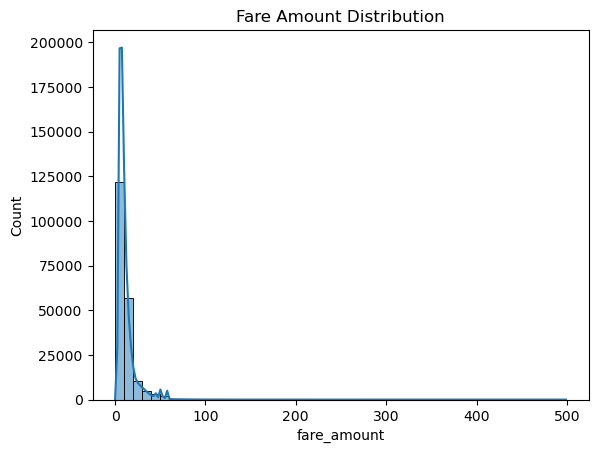

Index(['Unnamed: 0', 'key', 'fare_amount', 'pickup_datetime',
       'pickup_longitude', 'pickup_latitude', 'dropoff_longitude',
       'dropoff_latitude', 'passenger_count'],
      dtype='object')


ValueError: Could not interpret value `trip_distance` for `x`. An entry with this name does not appear in `data`.

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

# Fare distribution
sns.histplot(df_clean['fare_amount'], bins=50, kde=True)
plt.title("Fare Amount Distribution")
plt.show()
print(df_clean.columns)
sns.scatterplot(x='trip_distance', y='fare_amount', data=df_clean)
plt.title("Fare vs. Distance")
plt.show()



In [28]:
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])

df_clean['hour'] = df_clean['pickup_datetime'].dt.hour
df_clean['day'] = df_clean['pickup_datetime'].dt.day
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['weekday'] = df_clean['pickup_datetime'].dt.day_name()

# Peak/off-peak (e.g., 7-9 AM and 4-7 PM)
def peak_hour(hour):
    return 'Peak' if hour in range(7,10) or hour in range(16,19) else 'Off-Peak'

df_clean['time_category'] = df_clean['hour'].apply(peak_hour)


In [29]:
df_clean['pickup_datetime'] = pd.to_datetime(df_clean['pickup_datetime'])

df_clean['hour'] = df_clean['pickup_datetime'].dt.hour
df_clean['day'] = df_clean['pickup_datetime'].dt.day
df_clean['month'] = df_clean['pickup_datetime'].dt.month
df_clean['weekday'] = df_clean['pickup_datetime'].dt.day_name()

# Peak/off-peak (e.g., 7-9 AM and 4-7 PM)
def peak_hour(hour):
    return 'Peak' if hour in range(7,10) or hour in range(16,19) else 'Off-Peak'

df_clean['time_category'] = df_clean['hour'].apply(peak_hour)


In [30]:
df_clean['weekday'] = df_clean['weekday'].astype('category')
df_clean['time_category'] = df_clean['time_category'].astype('category')

In [31]:
df_clean.to_csv("uber_enhanced.csv", index=False)